In [3]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:10], len(words)

(['emma',
  'olivia',
  'ava',
  'isabella',
  'sophia',
  'charlotte',
  'mia',
  'amelia',
  'harper',
  'evelyn'],
 32033)

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [6]:
# # build the dataset

# block_size = 3 # context length: how many characters do we take to predict the next one?
# X, Y = [], []

# for w in words:

#   # print(w)
#   context = [0] * block_size
#   for ch in w + '.':
#     ix = stoi[ch]
#     X.append(context)
#     Y.append(ix)
#     # print(''.join(itos[i] for i in context), '--->', itos[ix])
#     context = context[1:] + [ix] # crop and append

# X = torch.tensor(X)
# Y = torch.tensor(Y)

In [78]:
# build the dataset

def build_dataset(words):
  block_size = 3
  X, Y = [], []

  for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [7]:
# for x, y in zip(X, Y):
#   print(x, '->', y.item())

In [79]:
# X.shape, X.dtype, Y.shape, Y.dtype

In [80]:
# C = torch.randn((27, 2)) # each of the 27 characters will have a 2 dimensional embedding

In [81]:
# C[5]

In [82]:
# F.one_hot(torch.tensor(5), num_classes=27).float() @ C

In [12]:
# (1 * 27) @ (27 * 2) -> 1 * 2

In [13]:
# C[[5, 6, 7]]

tensor([[ 0.9715,  0.7896],
        [ 0.8016, -1.3054],
        [ 0.7999,  0.7417]])

In [14]:
# F.one_hot(torch.tensor([5, 6, 7]), num_classes=27).float() @ C

tensor([[ 0.9715,  0.7896],
        [ 0.8016, -1.3054],
        [ 0.7999,  0.7417]])

In [15]:
# X, X.shape

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 torch.Size([228146, 3]))

In [16]:
# C[X], C[X].shape

(tensor([[[ 0.0272,  1.5171],
          [ 0.0272,  1.5171],
          [ 0.0272,  1.5171]],
 
         [[ 0.0272,  1.5171],
          [ 0.0272,  1.5171],
          [ 0.9715,  0.7896]],
 
         [[ 0.0272,  1.5171],
          [ 0.9715,  0.7896],
          [ 0.1488, -0.0930]],
 
         ...,
 
         [[ 0.1635,  0.3231],
          [ 0.1635,  0.3231],
          [-0.6778, -1.7269]],
 
         [[ 0.1635,  0.3231],
          [-0.6778, -1.7269],
          [ 0.1635,  0.3231]],
 
         [[-0.6778, -1.7269],
          [ 0.1635,  0.3231],
          [ 1.0550, -1.8632]]]),
 torch.Size([228146, 3, 2]))

In [17]:
# X[13, 2]

tensor(1)

In [18]:
# C[X][13, 2]

tensor([-0.1861, -0.6392])

In [19]:
# emb = C[X]
# emb.shape

torch.Size([228146, 3, 2])

In [20]:
# W1 = torch.randn((6, 100))
# b1 = torch.randn(100)      # 6 = 2 * 3, 100 is the number of neurons

In [21]:
# emb @ W1 + b1

In [22]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([228146, 6])

In [23]:
# torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [24]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [25]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [26]:
a.storage(), a.untyped_storage()

<ipython-input-26-74963e578f9d>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage(), a.untyped_storage()


( 0
  1
  2
  3
  4
  5
  6
  7
  8
  9
  10
  11
  12
  13
  14
  15
  16
  17
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18],
  0
  0
  0
  0
  0
  0
  0
  0
  1
  0
  0
  0
  0
  0
  0
  0
  2
  0
  0
  0
  0
  0
  0
  0
  3
  0
  0
  0
  0
  0
  0
  0
  4
  0
  0
  0
  0
  0
  0
  0
  5
  0
  0
  0
  0
  0
  0
  0
  6
  0
  0
  0
  0
  0
  0
  0
  7
  0
  0
  0
  0
  0
  0
  0
  8
  0
  0
  0
  0
  0
  0
  0
  9
  0
  0
  0
  0
  0
  0
  0
  10
  0
  0
  0
  0
  0
  0
  0
  11
  0
  0
  0
  0
  0
  0
  0
  12
  0
  0
  0
  0
  0
  0
  0
  13
  0
  0
  0
  0
  0
  0
  0
  14
  0
  0
  0
  0
  0
  0
  0
  15
  0
  0
  0
  0
  0
  0
  0
  16
  0
  0
  0
  0
  0
  0
  0
  17
  0
  0
  0
  0
  0
  0
  0
 [torch.storage.UntypedStorage(device=cpu) of size 144])

In [29]:
# emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

In [30]:
# h = emb.view(emb.shape[0], 6) @ W1 + b1
# h = emb.view(-1, 6) @ W1 + b1

In [31]:
# h.shape

torch.Size([228146, 100])

In [32]:
# h

tensor([[-0.4905,  0.1365, -0.2004,  ...,  2.5077,  1.2875, -2.4062],
        [-1.8093, -1.5497,  0.8841,  ...,  3.5713,  0.7080, -3.3160],
        [ 1.0750, -0.8513,  1.4673,  ..., -0.1831,  2.0559, -2.7178],
        ...,
        [ 2.3605, -1.2980,  2.3425,  ..., -2.5374,  1.7879,  1.2559],
        [-0.9738,  0.3690, -1.8029,  ..., -2.5059,  0.1165, -1.9850],
        [-2.3855, -3.7547, -0.6198,  ..., -2.0707,  0.1794,  3.2654]])

In [33]:
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [34]:
# h

tensor([[-0.4547,  0.1356, -0.1978,  ...,  0.9868,  0.8585, -0.9839],
        [-0.9478, -0.9137,  0.7085,  ...,  0.9984,  0.6094, -0.9974],
        [ 0.7914, -0.6917,  0.8991,  ..., -0.1810,  0.9678, -0.9913],
        ...,
        [ 0.9823, -0.8612,  0.9817,  ..., -0.9876,  0.9455,  0.8499],
        [-0.7503,  0.3531, -0.9471,  ..., -0.9868,  0.1160, -0.9630],
        [-0.9832, -0.9989, -0.5510,  ..., -0.9687,  0.1775,  0.9971]])

In [35]:
# h.shape

torch.Size([228146, 100])

In [36]:
# (emb.view(-1, 6) @ W1).shape, b1.shape

(torch.Size([228146, 100]), torch.Size([100]))

In [37]:
# 32 100
# 1  100

In [38]:
# W2 = torch.randn((100, 27))
# b2 = torch.randn(27)

In [39]:
# logits = h @ W2 + b2
# logits.shape

torch.Size([228146, 27])

In [40]:
# logits

tensor([[ -2.1939,   2.1658,  -9.8075,  ...,   6.3658,   0.8513,  -3.5297],
        [ -6.9331,  -0.5318,  -6.9179,  ...,  -2.4804,   5.1184,  -4.5291],
        [-12.7925,  -6.7669,  -1.8424,  ...,  -2.8071,  12.4308, -12.4096],
        ...,
        [-11.4635, -17.7410,   0.3727,  ...,  -0.3627,  12.0384,   2.1377],
        [  1.3617,   1.3427,   2.6263,  ...,   2.8306,   0.4741,   4.0289],
        [ -8.2741, -13.0315,   5.3465,  ...,  -1.0015,  15.3392,   1.8233]])

In [41]:
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
# probs.shape

torch.Size([228146, 27])

In [42]:
# Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [43]:
# torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [48]:
# loss = -probs[torch.arange(X.shape[0]), Y].log().mean()
# loss

tensor(16.2314)

In [45]:
# polished code

In [186]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) # 3 * 10
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [187]:
# sum(p.nelement() for p in parameters)

In [188]:
# # forward pass
# emb = C[X]
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# logits = h @ W2 + b2
# # counts = logits.exp()
# # probs = counts / counts.sum(1, keepdim=True)
# # loss = -probs[torch.arange(32), Y].log().mean()
# loss = F.cross_entropy(logits, Y)
# loss

In [189]:
lre = torch.linspace(-3, 0, 10000)
lrs = 10**lre
# lrs

In [190]:
lri = []
lossi = []
stepi = []

In [191]:
for p in parameters:
  p.requires_grad = True

for i in range(200_000):
  # minibatch construction
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])


  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  # lr = 0.1 # 0.1 for early epochs (as determined by lr tracking), 0.01 and 0.001 for later epochs
  for p in parameters:
    p.data -= lr * p.grad

  # track stats
  stepi.append(i)
  # lri.append(lr)
  # lri.append(lre[i])
  lossi.append(loss.log10().item())

print(loss.item())

1.6552212238311768


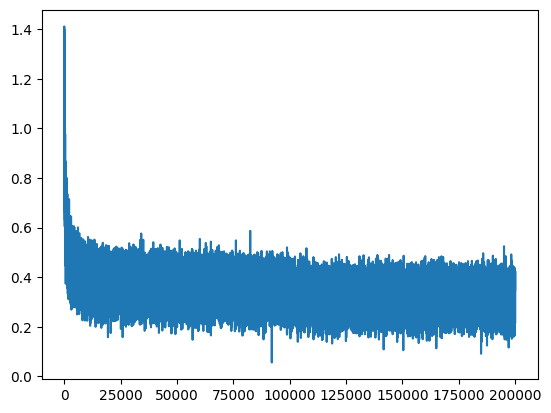

In [192]:
plt.plot(stepi, lossi);

In [193]:
# plt.plot(stepi, lossi);

In [162]:
# plt.plot(lri, lossi);

In [194]:
# logits.max(1)

In [195]:
# Y

In [196]:
# evaluation on training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1174, grad_fn=<NllLossBackward0>)

In [197]:
# evaluation on test set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1761, grad_fn=<NllLossBackward0>)

In [198]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

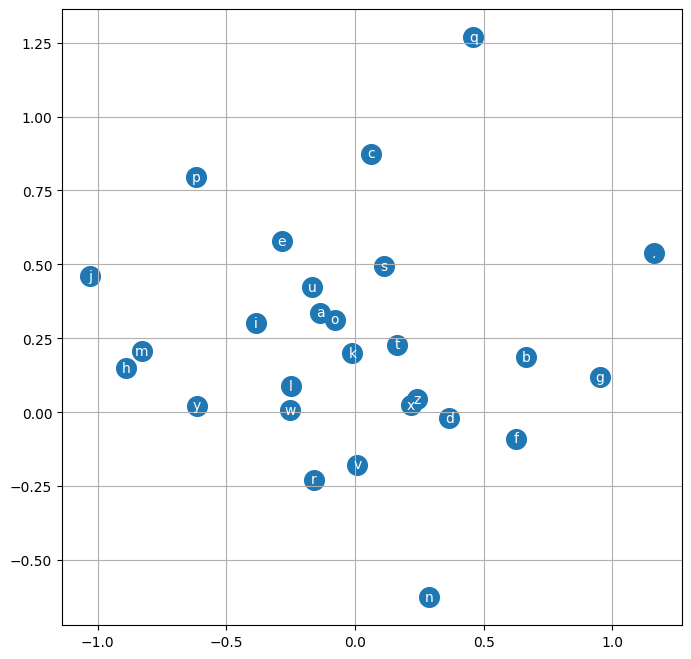

In [199]:
# visualization of embeddings when we used only 2 dimensions to represent each word
# plt.figure(figsize=(8, 8))
# plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
# for i in range(C.shape[0]):
#   plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center',
#            va='center', color='white')
# plt.grid('minor');

In [202]:
# sample from the model
g = torch.Generator().manual_seed(2147483647)
block_size = 3

for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])] # (1, block_size)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    out.append(ix)
    context = context[1:] + [ix]
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

junide.
jakasah.
presay.
adin.
korin.
tolian.
juhem.
sameia.
zamileneas.
dedaile.
imbi.
sery.
evy.
arteziaveunestion.
maj.
ponnelina.
jaylie.
raaya.
jocely.
jamiller.
